## Introduction
This exercise explores polynomial regression, a form of regression analysis where the relationship between the independent variable \( X \) and the dependent variable \( y \) is modeled as an \( n \)th degree polynomial. We will create a synthetic dataset, train models with varying degrees of polynomials, and evaluate their performance on different test sets.

## Task
We want to use polynomial regression to model the relationship between the independent variable \( X \) and the dependent variable \( y \).

## Dataset
We will create a synthetic dataset using the given equation. We will use this dataset to train polynomial regression models with varying degrees of polynomials.
We will also create different test sets to evaluate the models' performance.

## Objective
We want to find the degree of the polynomial that best fits the relationship between the independent variable \( X \) and the dependent variable \( y \). We will use the mean squared error (MSE) to evaluate the models' performance on different test sets.

## Plan
1. Create a synthetic dataset using the given equation.
2. Split the dataset into training and testing sets.
3. Train polynomial regression models with varying degrees of polynomials.
4. Evaluate the models' performance on different test sets using the mean squared error (MSE).
5. Find the degree of the polynomial that best fits the relationship between the independent variable \( X \) and the dependent variable \( y \).



# Implementation (100 Points)
We will start by creating a synthetic dataset using the given equation.

## 1. Create a synthetic dataset (20 Points)
First, define a function to generate a dataset with 1000 samples in the range of **-4 to -1** from a polynomial with added noise. Assume that the noise is from a normal distribution and has a mean of 0 and std of 5.

The relationship between the independent variable \( X \) and the dependent variable \( y \) is given by the following equation:

\[ y = 0.1X^5 + X^4 - 2X^3 + 7X^2 - 9X + 3 \]

Generate the independent variable \( X \) using the `numpy` library and then calculate the dependent variable \( y \) using the given equation.

In [227]:
import numpy as np

def generate_dataset(range_start, range_end, num_samples, noise_std=5.0):
    X = np.random.rand(num_samples, 1) * (range_end - range_start) + range_start
    y = 0.1*X**5 + X**4 - 2*X**3 + 7*X**2 - 9*X + 3
    y += np.random.normal(0, noise_std, X.shape)
    return X, y

In [228]:
X, y = generate_dataset(-4, -1, 1000)
# print(X)
# print(y)

## 2. Splitting the Dataset (5 Points)
Split the dataset into training and two test sets with the same length, ensuring one test set is in the range of the training data and the other is in the **range of 5 to 7.**

In [229]:
from sklearn.model_selection import train_test_split

degree = 5

# TODO: Split dataset into training and in-range testing
X_train, X_test_in_range, y_train, y_test_in_range = train_test_split(X, y, test_size=0.2)

# TODO: Generate out-of-range testing set
X_test_out_of_range, y_test_out_of_range = generate_dataset(5, 7, 200)

## 3. Polynomial Regression Training (30 Points)
Train polynomial regression models of varying degrees from degree = 2 to degree = 7. You can use the `preprocessing`, `linear_model`, and `pipeline` classes of the `sklearn` library.

In [230]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

def train_polynomial_regression(X, y, degree):
    # TODO: train the model based on the given degree
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X, y)
    return model

In [231]:
models = {}
# TODO: Put the models with different degrees in the models dict
for d in range(2, degree + 3):
    models[d] = train_polynomial_regression(X_train, y_train, d)

## 4. Model Evaluation (15 Points)
Evaluate the models on both test sets using MSE. You can use the `mean_squared_error` from `sklearn.metrics`.


In [232]:
from sklearn.metrics import mean_squared_error

def evaluate_models(models, X_test, y_test):
    losses = {}
    # TODO: Calculate each model's loss on the sets.
    for degree, model in models.items():
        y_pred = model.predict(X_test)
        losses[degree] = mean_squared_error(y_test, y_pred)
    return losses

In [233]:
losses_train = evaluate_models(models, X_train, y_train)
losses_in_range = evaluate_models(models, X_test_in_range, y_test_in_range)
losses_out_of_range = evaluate_models(models, X_test_out_of_range, y_test_out_of_range)

## 5. Plotting Model Scores (20 Points)

Now to evaluate the performance of the polynomial regression models, plot the **logarithm** of losses of the training and two test sets based on the model degree varying from 3 to 7. Train the model a few times to get a sense of how the results can change.


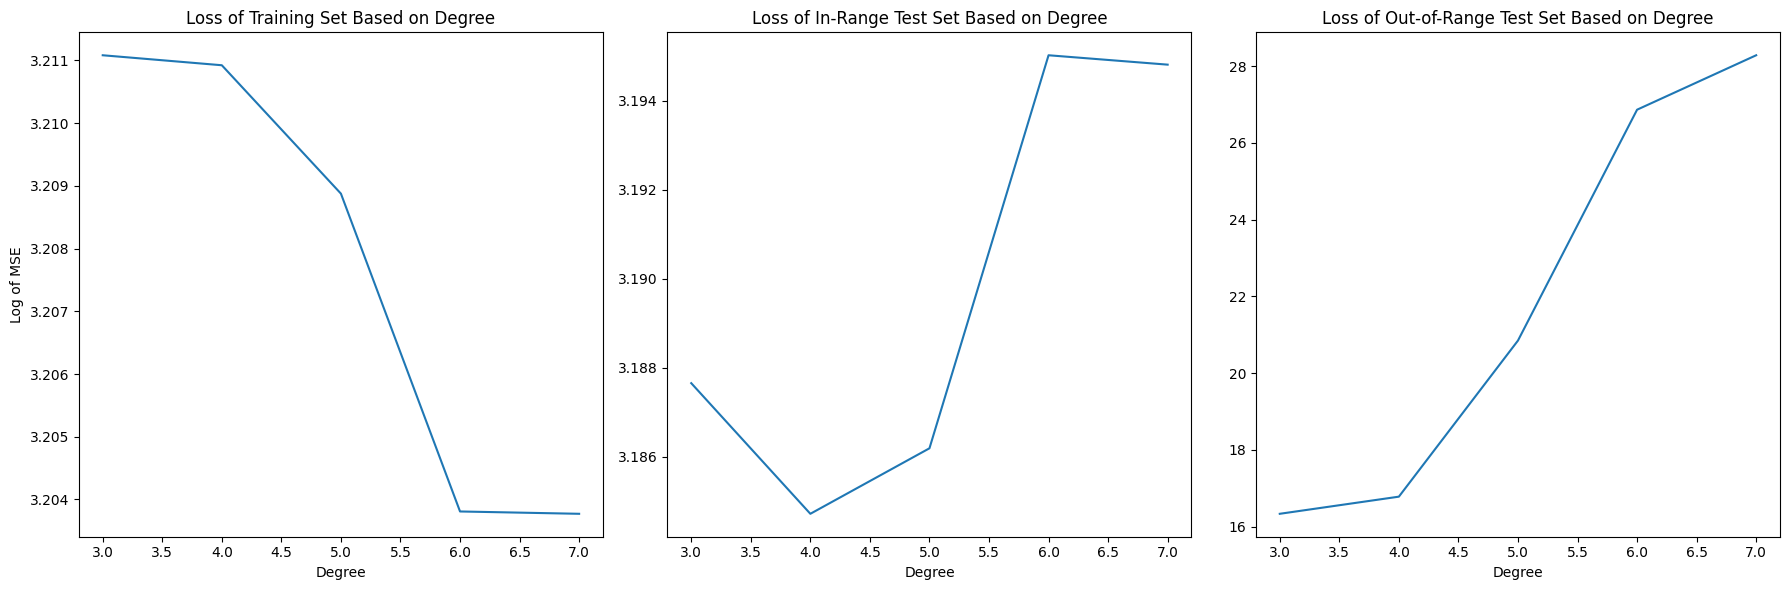

In [234]:
from matplotlib import pyplot as plt

# TODO: Plot the logarithm of loss based on the model degrees from 3 to 7

# Create three subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

# TODO: Plot logarithm of losses of training set
ax1.plot([key for key in losses_train if 3 <= key <= 7],
         np.log([losses_train[key] for key in losses_train if 3 <= key <= 7]),
         label='Training Loss')
ax1.set_title('Loss of Training Set Based on Degree')
ax1.set_xlabel('Degree')
ax1.set_ylabel('Log of MSE')

# TODO: Plot logarithm of losses of in-range test set
ax2.plot([key for key in losses_in_range if 3 <= key <= 7],
         np.log([losses_in_range[key] for key in losses_in_range if 3 <= key <= 7]),
         label='In-Range Test Loss')
ax2.set_title('Loss of In-Range Test Set Based on Degree')
ax2.set_xlabel('Degree')
ax1.set_ylabel('Log of MSE')

# TODO: Plot logarithm of losses of out-of-range test set
ax3.plot([key for key in losses_out_of_range if 3 <= key <= 7],
         np.log([losses_out_of_range[key] for key in losses_out_of_range if 3 <= key <= 7]),
         label='Out-of-Range Test Loss')
ax3.set_title('Loss of Out-of-Range Test Set Based on Degree')
ax3.set_xlabel('Degree')
ax1.set_ylabel('Log of MSE')

plt.tight_layout()
plt.show()


## Conclusion (10 Points)

Now print out the losses on each set here.

In [235]:
# TODO: print each model loss on the training and the two test sets
print("Training Losses:", losses_train)
print("In-Range Test Losses:", losses_in_range)
print("Out-of-Range Test Losses:", losses_out_of_range)

Training Losses: {2: 33.251284398476315, 3: 24.805928978215384, 4: 24.801979779339252, 5: 24.751254253487176, 6: 24.62614124195472, 7: 24.62522753235693}
In-Range Test Losses: {2: 34.371281071234336, 3: 24.231421786508808, 4: 24.160403294491317, 5: 24.195985667996002, 6: 24.410612686711353, 7: 24.40546236559086}
Out-of-Range Test Losses: {2: 266982.29327475285, 3: 12437070.813384356, 4: 19436050.110271398, 5: 1135407192.3259256, 6: 465143886698.9949, 7: 1921659180381.6235}


With comparing the loss of **training set and the in-range test set** and also **in-range test set and the out-of-range test set**, specially in higher degrees, what we can conclude about the bias - variance trade off?

**Answer:**

The training loss decreases when the degree of the model increases.  This means that the model is becoming more complex and fitting  training data set. But we see that too high degree is showing overfittig, because it is learning training data set too well.

The in-range test loss first decreases and then starts to increase when the model degree increases.  The decrease means that the complexity is helping to generalize better to unseen data that is similar to the training data. But then the increase shows the beginning of overfitting.

 The out-of-range test loss increases a lot with higher degrees. This increase is a sign of overfitting. This results in high variance.

 Bias-Variance Trade-Off: At lower degrees, the model is too simple, showing high bias. It doesn't capture the complexity of the data set, so we have errors on both the training and test sets. Between degrees 3 and 4 (and maybe 5), we have the optimal model complexity, here the increase of variance is balanced by the decrease of bias, minimizing the total error.  At higher degrees, the model's variance is too high. While the training loss continues to decrease, the out-of-range test loss increases significantly, showing that the model is highly fitting to the training data and is predicting badly on unseen data that is not similar to the training set.

Expected to explain overfitiing on the training set and also the face that model has less generalization to unseen data.